**Please visit https://ProStepSky.github.io/.**

This work © 2024 by "ProStepSky.github.io จัดทำโดย S.U." is licensed under [CC BY-NC-ND 4.0](http://creativecommons.org/licenses/by-nc-nd/4.0/)  
(อ้างอิงแหล่งที่มา ห้ามนำไปใช้เพื่อการค้า และห้ามดัดแปลง)

---

# Import Libraries

In [1]:
import numpy as np
import pandas as pd

In [2]:
# Suppress all warnings 
import warnings
warnings.filterwarnings("ignore")

# Loading the Data and Selecting the Features

### Import Data

In [3]:
loan_data_inputs_train = pd.read_csv('./data/loan_data_inputs_train.csv', index_col = 0)
loan_data_targets_train = pd.read_csv('./data/loan_data_targets_train.csv', index_col = 0)
loan_data_inputs_test = pd.read_csv('./data/loan_data_inputs_test.csv', index_col = 0)
loan_data_targets_test = pd.read_csv('./data/loan_data_targets_test.csv', index_col = 0)
# index_col = 0, makes sure the 1st column of the csv will be used as index.

# For old version conda environments that export target csv files without a column name,
# use 'header = None' to prevent making the 1st row as a header.
#loan_data_targets_train = pd.read_csv('./data/loan_data_targets_train.csv', index_col = 0, header = None)
#loan_data_targets_test = pd.read_csv('./data/loan_data_targets_test.csv', index_col = 0, header = None)

เปิด PD model (Logistic Regression model) จาก disk:

In [4]:
from sklearn import linear_model
import scipy.stats as stat

class LogisticRegression_with_p_values:
    
    # Inherit everything from the original LogisticRegression class.
    def __init__(self,*args,**kwargs):#,**kwargs):
        
        # -------------------------------------------------------
        # This function will be provided upon request. Thank you.
        # -------------------------------------------------------

    # Overwrite .fit() with a function that calculate p-values.
    def fit(self,X,y):
        
        # -------------------------------------------------------
        # This function will be provided upon request. Thank you.
        # -------------------------------------------------------

In [5]:
import pickle

In [6]:
filehandler = open('./data/pd_model.pkl','rb')
reg2 = pickle.load(filehandler)
filehandler.close()

---
---
---

# ➡ <font color='dodgerblue'><u>PD Model Validation (Testing the Model)</u></font> ⬅

### Out-of-sample validation (testing)

สร้าง DataFrame เพื่อเก็บเพียงแค่ dummy variables ที่ใช้กับ Final PD Model ซึ่งคัดเลือกแล้วว่ามีส่วนช่วยในการทำนายการผิดนัดชำระหนี้:

In [7]:
inputs_test_with_ref_cat = loan_data_inputs_test.loc[: , ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:smb_edu_mov_house_renew_wedd',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth_med_vacation',
'purpose:homeimpv_majorpurch_car',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'mths_since_issue_d:<38',
'mths_since_issue_d:38-39',
'mths_since_issue_d:40-41',
'mths_since_issue_d:42-48',
'mths_since_issue_d:49-52',
'mths_since_issue_d:53-64',
'mths_since_issue_d:65-84',
'mths_since_issue_d:>84',
'int_rate:<=9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'mths_since_earliest_cr_line:141-184',
'mths_since_earliest_cr_line:185-264',
'mths_since_earliest_cr_line:265-352',
'mths_since_earliest_cr_line:>352',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'total_rev_hi_lim:<=5K',
'total_rev_hi_lim:5K-10K',
'total_rev_hi_lim:10K-20K',
'total_rev_hi_lim:20K-30K',
'total_rev_hi_lim:30K-40K',
'total_rev_hi_lim:40K-55K',
'total_rev_hi_lim:55K-95K',
'total_rev_hi_lim:>95K',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>86',
]]

สร้างตัวแปร ref_categories เก็บชื่อของ reference category dummy variables ที่ใช้กับ Final PD Model ซึ่งคัดเลือกแล้วว่ามีส่วนช่วยในการทำนายการผิดนัดชำระหนี้:

In [8]:
ref_categories = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'verification_status:Verified',
'purpose:smb_edu_mov_house_renew_wedd',
'initial_list_status:f',
'term:60',
'emp_length:0',
'mths_since_issue_d:>84',     
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'total_rev_hi_lim:<=5K',
'annual_inc:<20K',
'dti:>35',
'mths_since_last_delinq:0-3',
'mths_since_last_record:0-2']

ทำการ drop ตัวแปรที่เป็น reference category dummy variables:

In [9]:
inputs_test = inputs_test_with_ref_cat.drop(ref_categories, axis = 1)
inputs_test.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,...,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
362514,False,False,True,False,False,False,False,True,0,False,...,1,0,0,0,1,0,0,0,0,0
288564,False,False,False,False,True,False,False,True,0,False,...,0,0,0,0,1,0,0,0,0,0
213591,False,False,True,False,False,False,False,True,0,False,...,0,0,1,0,1,0,0,0,0,0
263083,False,False,True,False,False,False,False,True,0,False,...,1,0,0,0,1,0,0,0,0,0
165001,True,False,False,False,False,False,False,True,0,False,...,0,0,1,0,1,0,0,0,0,0


ทำการทำนาย Probability of Default (PD) สำหรับแต่ละผู้ขอกู้จาก test dataset (ทำนายโดยใช้ default cut-off ที่ 50%; นั่นคือ <= 50% จะทำนายว่าผิดนัดชำระหนี้; นั่นคือ bad borrower = 0 และ good borrower = 1):

In [10]:
y_hat_test = reg2.model.predict(inputs_test)

In [11]:
y_hat_test

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

ทำการทำนาย Probability of Default (PD) สำหรับแต่ละผู้ขอกู้จาก test dataset (โดยจะไม่ทำนายเป็นผลลัพธ์ว่าผิดหรือไม่ผิดนัดชำระหนี้ แต่จะให้ผลลัพธ์คือความน่าจะเป็นดิบ หรือ raw probabilities):

In [12]:
y_hat_test_proba = reg2.model.predict_proba(inputs_test)

In [13]:
y_hat_test_proba

array([[0.08072197, 0.91927803],
       [0.13824394, 0.86175606],
       [0.1162796 , 0.8837204 ],
       ...,
       [0.02431967, 0.97568033],
       [0.04256716, 0.95743284],
       [0.05009425, 0.94990575]])

จาก array ข้างบน:
- column แรกคือ Probability of Default (PD) หรือความน่าจะเป็นที่จะเป็น bad borrower
- column ที่สองคือ 1-PD หรือความน่าจะเป็นที่จะเป็น good borrower

เลือกเก็บเฉพาะ column ที่สอง (ความน่าจะเป็นที่จะเป็น good borrower):

In [14]:
y_hat_test_proba[:][:,1]

array([0.91927803, 0.86175606, 0.8837204 , ..., 0.97568033, 0.95743284,
       0.94990575])

In [15]:
y_hat_test_proba = y_hat_test_proba[: ][: , 1]

In [16]:
y_hat_test_proba

array([0.91927803, 0.86175606, 0.8837204 , ..., 0.97568033, 0.95743284,
       0.94990575])

ทำการรวมค่าจริง (loan_data_targets_test) กับค่าทำนาย (y_hat_test_proba) ไว้ใน DataFrame เดียวกัน:

In [17]:
loan_data_targets_test_temp = loan_data_targets_test

In [18]:
loan_data_targets_test_temp.reset_index(drop = True, inplace = True)

In [19]:
df_actual_predicted_probs = pd.concat([loan_data_targets_test_temp, pd.DataFrame(y_hat_test_proba)], axis = 1)

In [20]:
df_actual_predicted_probs.shape

(93257, 2)

In [21]:
df_actual_predicted_probs.columns = ['loan_data_targets_test', 'y_hat_test_proba']

In [22]:
# Make the index of one DataFrame equal to the index of another DataFrame.
df_actual_predicted_probs.index = loan_data_inputs_test.index

In [23]:
df_actual_predicted_probs.head()

,loan_data_targets_test,y_hat_test_proba
362514,1,0.919278
288564,1,0.861756
213591,1,0.883720
263083,1,0.934505
165001,1,0.967827


### Accuracy and Area under the Curve

#### ทำนาย Probability of Default (PD) โดยใช้ threshold หรือ cut-off probability เท่ากับ 50%:

In [24]:
tr = 0.5
df_actual_predicted_probs['y_hat_test'] = np.where(df_actual_predicted_probs['y_hat_test_proba'] > tr, 1, 0)

แสดง confusion matrix:

In [25]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'],
            df_actual_predicted_probs['y_hat_test'],
            rownames = ['Actual'],
            colnames = ['Predicted'])

Predicted,0,1
Actual,,
0,6,10184
1,5,83062


จาก confusion matrix พบว่า:

จากจำนวน bad borrowers ทั้งหมด, มีเพียง 6 คนเท่านั้นที่ทำนายได้ถูกต้องว่าเป็น bad, ในขณะที่ 10,184 คนทำนายผิดว่าเป็น good

นั่นคือ มีจำนวน false positive ที่สูงมาก ซึ่งเป็นปัญหาที่ใหญ่มาก (เป็นเพราะว่าใน dataset นี้ มีผู้ขอกู้จำนวนน้อยที่จะผิดนัดชำระหนี้ ทำให้ model เรียนรู้แล้วจำแนกเคสส่วนใหญ่ให้เป็น good)

นี่แสดงให้เห็นว่า หากใช้ threshold หรือ cut-off ที่ default เท่ากับ 50% นั้น จะทำให้ bad borrowers จำนวนมากได้รับการอนุมัติ ซึ่งเป็นเรื่องที่ไม่สามารถยอมให้เกิดขึ้นได้

แสดง confusion matrix (แสดงเป็นสัดส่วนต่อผู้ขอกู้ทั้งหมด):

In [26]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'],
            df_actual_predicted_probs['y_hat_test'],
            rownames = ['Actual'],
            colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]

Predicted,0,1
Actual,,
0,0.000064,0.109204
1,0.000054,0.890678


คำนวณค่า accuracy ของ model ตัวนี้ (สัดส่วนของจำนวนที่ทำนายถูกทั้งหมดต่อผู้ขอกู้ทั้งหมด):

In [27]:
# True Negative
tn = (pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'],
                  df_actual_predicted_probs['y_hat_test'],
                  rownames = ['Actual'],
                  colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[0, 0]

# True Positive
tp = (pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'],
                  df_actual_predicted_probs['y_hat_test'],
                  rownames = ['Actual'],
                  colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[1, 1]

tn + tp

0.8907427860643169

---

#### ทำนาย Probability of Default (PD) โดยใช้ threshold หรือ cut-off probability เท่ากับ 90%:

In [28]:
tr = 0.9
df_actual_predicted_probs['y_hat_test'] = np.where(df_actual_predicted_probs['y_hat_test_proba'] > tr, 1, 0)

แสดง confusion matrix:

In [29]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'],
            df_actual_predicted_probs['y_hat_test'],
            rownames = ['Actual'],
            colnames = ['Predicted'])

Predicted,0,1
Actual,,
0,7355,2835
1,35799,47268


แสดง confusion matrix (แสดงเป็นสัดส่วนต่อผู้ขอกู้ทั้งหมด):

In [30]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'],
            df_actual_predicted_probs['y_hat_test'],
            rownames = ['Actual'],
            colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]

Predicted,0,1
Actual,,
0,0.078868,0.030400
1,0.383875,0.506857


คำนวณค่า accuracy ของ model ตัวนี้ (สัดส่วนของจำนวนที่ทำนายถูกทั้งหมดต่อผู้ขอกู้ทั้งหมด):

In [31]:
# True Negative
tn = (pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'],
                  df_actual_predicted_probs['y_hat_test'],
                  rownames = ['Actual'],
                  colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[0, 0]

# True Positive
tp = (pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'],
                  df_actual_predicted_probs['y_hat_test'],
                  rownames = ['Actual'],
                  colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[1, 1]

tn + tp

0.5857254683294552

จากการทำนายโดยใช้ threshold ที่ 90% ข้างบนพบว่า:

ค่า accuracy ของ model ลดลงไปมากกว่าตอนใช้ threshold ที่ 50%

แต่ว่า จากจำนวน bad borrowers ทั้งหมด มี 7,355 คนที่ทำนายได้ถูกต้องว่าเป็น bad, และมี 2,835 คนที่ทำนายผิดว่าเป็น good

ในขณะเดียวกัน จากจำนวน good borrowers ทั้งหมด 83,067 คน มีเพียง 47,268 คนเท่านั้นที่ทำนายได้ถูกต้องว่าเป็น good

มี false positive ลดลงไปมากก็จริง แต่ true positive ก็ลดลงไปมากเช่นกัน

หากผู้ให้กู้ใช้ threshold นี้ในการทำนาย จะช่วยลดจำนวนผู้ขอกู้ที่ผิดนัดชำระหนี้ได้ แต่ก็ลดจำนวนผู้ขอกู้ที่ได้รับการอนุมัติด้วยเช่นกัน

ดังนั้น threshold ที่ 90% อาจจะ conservative มากเกินไป สถาบันการเงินต้องการลดความเสี่ยงก็จริง แต่สถาบันการเงินก็ต้องการกำไรจากการปล่อยเงินกู้ด้วยเช่นกัน

---

วาดกราฟ Receiver Operating Characteristic (ROC) curve:

In [32]:
from sklearn.metrics import roc_curve, roc_auc_score

In [33]:
roc_curve(df_actual_predicted_probs['loan_data_targets_test'], # Actual
          df_actual_predicted_probs['y_hat_test_proba']) # Predicted

# Return 3 arrays:
# - False positive rates
# - True positive rates
# - Thresholds

(array([0.        , 0.        , 0.        , ..., 0.99990186, 1.        ,
        1.        ]),
 array([0.00000000e+00, 1.20384750e-05, 1.92615599e-04, ...,
        9.99987962e-01, 9.99987962e-01, 1.00000000e+00]),
 array([       inf, 0.99223663, 0.99048829, ..., 0.39052098, 0.38779374,
        0.36639871]))

จากข้างบน นำ 3 arrays ที่ได้นี้ ไปเก็บแยกเป็นตัวแปร fpr, tpr, thresholds:

In [34]:
fpr, tpr, thresholds = roc_curve(df_actual_predicted_probs['loan_data_targets_test'],
                                 df_actual_predicted_probs['y_hat_test_proba'])

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() # Set the default style of the graphs to the seaborn style. 

โดยทั่วไปแล้ว กำหนดให้ true positive rate (tpr) เป็นฟังก์ชั่นของ false positive rate (fpr) จึงให้ fpr เป็นแกน x และ tpr เป็นแกน y

และ ทำการวาดเส้นประทแยงสีดำซึ่งหมายถึงเหตุการณ์ที่เกิดขึ้นอย่างบังเอิญ (เช่น การโยนเหรียญมีโอกาสออกหัวก้อย 50/50) เพื่อใช้เส้นทแยงนี้เป็น benchmark

วาดกราฟดังกล่าว:

Text(0.5, 1.0, 'ROC curve')

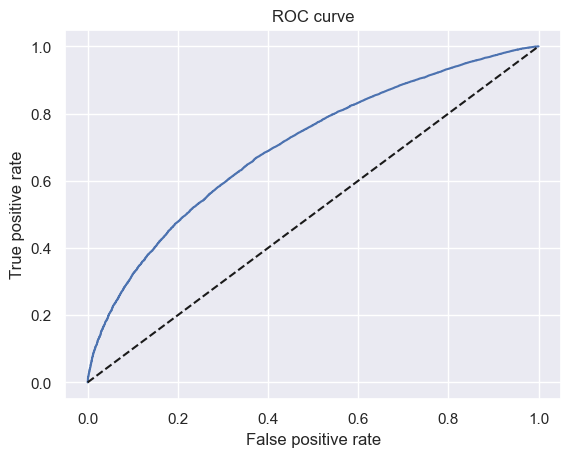

In [36]:
# Plot the ROC curve.
plt.plot(fpr, tpr)

# Plot a secondary diagonal dashed line.
plt.plot(fpr, fpr, linestyle = '--', color = 'k')

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')

ยิ่งค่า true positive rate สูง โอกาสได้ false negative (ของจริงคือ good แต่ทำนายว่า bad) ก็ยิ่งน้อย

เส้นสีน้ำเงิน (PD model ที่จุด thresholds ต่าง ๆ) อยู่เหนือเส้น benchmark ตลอดทุกจุด thresholds หมายความว่ามี true positive rate สูงกว่าเหตุการณ์ที่เกิดขึ้นอย่างบังเอิญ เช่น การโยนเหรียญมีโอกาสออกหัวก้อย 50/50

หมายความว่า PD model สามารถทำนายได้ดีกว่าเส้น benchmark

PD model นี้ ทำนายได้ดีกว่าแค่ไหน สามารถวัดได้จาก Area Under the ROC Curve (AUC)

คำนวณ Area Under the Curve (AUC):

In [37]:
AUROC = roc_auc_score(df_actual_predicted_probs['loan_data_targets_test'],
                      df_actual_predicted_probs['y_hat_test_proba'])
AUROC

0.7018963468875575

สำหรับเหตุการณ์ที่เกิดขึ้นอย่างบังเอิญ เช่น การโยนเหรียญมีโอกาสออกหัวก้อย 50/50 นั้น:
- Area Under the Curve (AUC) มีค่าเท่ากับ 50%

สำหรับ PD model นี้:
- Area Under the Curve (AUC) มีค่าเท่ากับ 70.19%
- AUC = 70.19% นี้ โดยทั่วไปถือว่าสามารถทำนายได้ดีปานกลาง

---

### Gini and Kolmogorov-Smirnov

Gini และ Kolmogorov-Smirnov เป็นเกณฑ์ที่ใช้วัดประสิทธิภาพของ model ซึ่งมีความเฉพาะทางสำหรับ Credit Risk Modelling ยิ่งกว่าการใช้เพียงแค่ Receiver Operating Characteristic (ROC) curve หรือ Area Under the Curve (AUC)

เรียงค่า y_hat_test_proba จากน้อยไปมาก ก่อนจะไปวาดกราฟ Gini:

In [38]:
# Sort by the values of a specific column.
df_actual_predicted_probs = df_actual_predicted_probs.sort_values('y_hat_test_proba')

In [39]:
df_actual_predicted_probs.head()

,loan_data_targets_test,y_hat_test_proba,y_hat_test
42341,1,0.366399,0
39810,0,0.387794,0
42344,1,0.390521,0
40518,0,0.452833,0
42396,0,0.460529,0


In [40]:
df_actual_predicted_probs.tail()

,loan_data_targets_test,y_hat_test_proba,y_hat_test
268754,1,0.991483,1
282589,1,0.991541,1
242624,1,0.991742,1
262480,1,0.991929,1
300940,1,0.992237,1


In [41]:
# Reset the index of a DataFrame and overwrite it.
df_actual_predicted_probs = df_actual_predicted_probs.reset_index()

In [42]:
df_actual_predicted_probs.head()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test
0,42341,1,0.366399,0
1,39810,0,0.387794,0
2,42344,1,0.390521,0
3,40518,0,0.452833,0
4,42396,0,0.460529,0


สร้าง columns เพิ่มใน DataFrame โดยคำนวณค่า:
- Cumulative number of total population
- Cumulative number of good borrowers
- Cumulative number of bad borrowers

ดังต่อไปนี้:

In [43]:
# Calculate the cumulative number of all observations.
# +1 to each index since indexing in python starts from 0.
df_actual_predicted_probs['Cumulative N Population'] = df_actual_predicted_probs.index + 1

# Calculate the cumulative sum of an actual 'good' column.
df_actual_predicted_probs['Cumulative N Good'] = df_actual_predicted_probs['loan_data_targets_test'].cumsum()

# Calculate the cumulative sum of an actual 'bad' column,
# by calculate the difference between 'Cumulative N Population' and 'Cumulative N Good' for each row.
df_actual_predicted_probs['Cumulative N Bad'] = df_actual_predicted_probs['Cumulative N Population'] - df_actual_predicted_probs['Cumulative N Good']

In [44]:
df_actual_predicted_probs.head()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test,Cumulative N Population,Cumulative N Good,Cumulative N Bad
0,42341,1,0.366399,0,1,1,0
1,39810,0,0.387794,0,2,1,1
2,42344,1,0.390521,0,3,2,1
3,40518,0,0.452833,0,4,2,2
4,42396,0,0.460529,0,5,2,3


สร้าง columns เพิ่มใน DataFrame โดยคำนวณค่า:
- Cumulative % of total population
- Cumulative % of good borrowers
- Cumulative % of bad borrowers

ทำได้โดยการหาร cumulative แต่ละอัน ด้วย total ของตัวมันเอง:

In [45]:
# Calculate the cumulative % of all observations.
df_actual_predicted_probs['Cumulative Perc Population'] = df_actual_predicted_probs['Cumulative N Population'] / (df_actual_predicted_probs.shape[0])

# Calculate cumulative % of 'good' borrowers.
df_actual_predicted_probs['Cumulative Perc Good'] = df_actual_predicted_probs['Cumulative N Good'] / df_actual_predicted_probs['loan_data_targets_test'].sum()

# Calculate the cumulative % of 'bad' borrowers.
df_actual_predicted_probs['Cumulative Perc Bad'] = df_actual_predicted_probs['Cumulative N Bad'] / (df_actual_predicted_probs.shape[0] - df_actual_predicted_probs['loan_data_targets_test'].sum())

In [46]:
df_actual_predicted_probs.head()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test,Cumulative N Population,Cumulative N Good,Cumulative N Bad,Cumulative Perc Population,Cumulative Perc Good,Cumulative Perc Bad
0,42341,1,0.366399,0,1,1,0,0.000011,0.000012,0.000000
1,39810,0,0.387794,0,2,1,1,0.000021,0.000012,0.000098
2,42344,1,0.390521,0,3,2,1,0.000032,0.000024,0.000098
3,40518,0,0.452833,0,4,2,2,0.000043,0.000024,0.000196
4,42396,0,0.460529,0,5,2,3,0.000054,0.000024,0.000294


### Gini:

Text(0.5, 1.0, 'Gini')

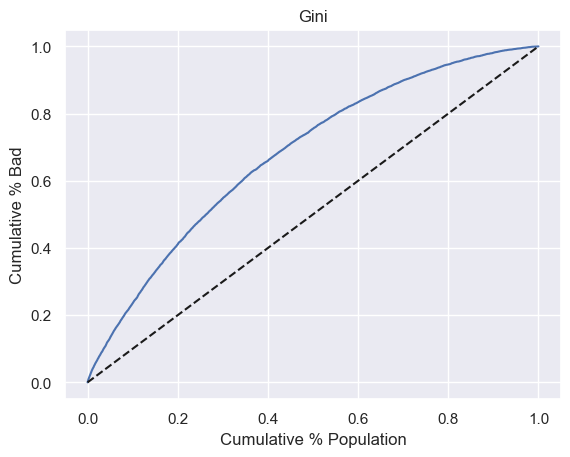

In [47]:
# Plot the Gini curve.
plt.plot(df_actual_predicted_probs['Cumulative Perc Population'],
         df_actual_predicted_probs['Cumulative Perc Bad'])

# Plot a secondary diagonal dashed line.
plt.plot(df_actual_predicted_probs['Cumulative Perc Population'],
         df_actual_predicted_probs['Cumulative Perc Population'],
         linestyle = '--', color = 'k')

plt.xlabel('Cumulative % Population')
plt.ylabel('Cumulative % Bad')
plt.title('Gini')

คำนวณค่า Gini โดยใช้ Area Under the ROC Curve (AUROC) ยิ่งค่าสูงยิ่งแสดงถึงความเหลื่อมล้ำ หมายความว่า model ยิ่งแบ่งแยก good กับ bad borrowers ได้ดี:

In [48]:
Gini = AUROC * 2 - 1
Gini

0.40379269377511506

### Kolmogorov-Smirnov:

ให้เส้นสีแดงเป็น cumulative distribution function ของ 'bad' borrowers

ให้เส้นสีน้ำเงินเป็น cumulative distribution function ของ 'good' borrowers

ดังนี้:

Text(0.5, 1.0, 'Kolmogorov-Smirnov')

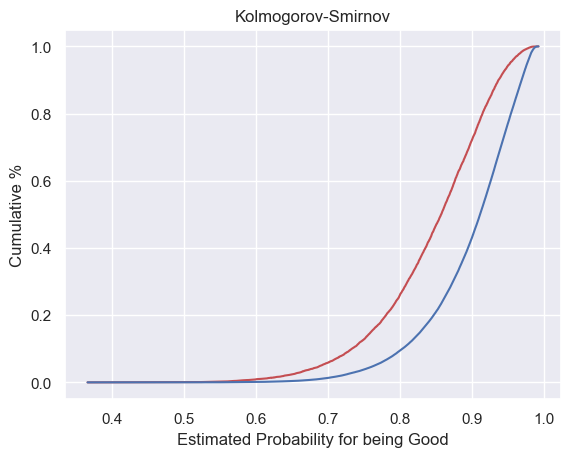

In [49]:
# Plot the estimated (predicted) probabilities of 'good' along the x-axis.
# Plot the cumulative % 'bad' borrowers along the y-axis.
plt.plot(df_actual_predicted_probs['y_hat_test_proba'],
         df_actual_predicted_probs['Cumulative Perc Bad'], color = 'r')

# Plot the estimated (predicted) probabilities of 'good' along the x-axis.
# Plot the cumulative % 'good' borrowers along the y-axis.
plt.plot(df_actual_predicted_probs['y_hat_test_proba'],
         df_actual_predicted_probs['Cumulative Perc Good'], color = 'b')

plt.xlabel('Estimated Probability for being Good')
plt.ylabel('Cumulative %')
plt.title('Kolmogorov-Smirnov')

คำนวณค่าที่แตกต่างกันมากสุดระหว่าง cumulative percentage ของ bad borrowers, the cumulative percentage ของ good borrowers (ยิ่งค่าสูง model ยิ่งแยก good กับ bad borrowers ออกจากกันได้ดี):

In [50]:
KS = max(df_actual_predicted_probs['Cumulative Perc Bad'] - df_actual_predicted_probs['Cumulative Perc Good'])
KS

0.29490408283047304

ค่า Kolmogorov-Smirnov ที่ได้ไม่ค่อยสูงมาก คือไม่ค่อยเข้าใกล้ 1; แต่อย่างไรก็ตาม ค่าที่ได้ก็มากกว่า 0 พอสมควร

จากกราฟ Kolmogorov-Smirnov พบว่า cumulative distribution functions ทั้งสองอยู่ห่างจากกันมากพอ และ model สามารถทำนายผลได้อย่างน่าพอใจ

---

# End of notebook.

---